## Analyse The Impact of Student Habits on academic performance

### Exploring how different lifestyle habits affect student's academic performance . With 1,000 synthetic student records and 15+ features including :
- ##### study hours
- ##### sleep patterns
- ##### social media usage
- ##### diet quality
- ##### mental health
- ##### final exam scores 

### By analyzing these factors, the goal is to answer key questions that many students wonder about:
- ##### What are the habits that improve academic performance ?
- ##### Which habits negatively affect academic performance ?
- ##### What are the most efficient habits to achieve good results with minimal effort ?

### This dataset is ideal for educational analysis and experimentation making it ideal for understanding student behavior and drawing actionable insights

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## Explore the dataset and extract insights

In [49]:
df = pd.read_csv('student_habits_performance.csv')
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [3]:
df.shape

(1000, 16)

In [4]:
column = df.columns
print(f'columns : {column}')

columns : Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')


In [5]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [6]:
#Search for missing data
for i in range(len(column)):
    print(f"{column[i]}: {df[column[i]].isnull().sum()}")


student_id: 0
age: 0
gender: 0
study_hours_per_day: 0
social_media_hours: 0
netflix_hours: 0
part_time_job: 0
attendance_percentage: 0
sleep_hours: 0
diet_quality: 0
exercise_frequency: 0
parental_education_level: 91
internet_quality: 0
mental_health_rating: 0
extracurricular_participation: 0
exam_score: 0


In [7]:
#Data type of features
for i in range(len(column)):
    print(f"{column[i]}: {df[column[i]].dtype}")

student_id: object
age: int64
gender: object
study_hours_per_day: float64
social_media_hours: float64
netflix_hours: float64
part_time_job: object
attendance_percentage: float64
sleep_hours: float64
diet_quality: object
exercise_frequency: int64
parental_education_level: object
internet_quality: object
mental_health_rating: int64
extracurricular_participation: object
exam_score: float64


In [8]:
for i in range(len(column)):
    print(f"{column[i]}: {df[column[i]].nunique()}")

student_id: 1000
age: 8
gender: 3
study_hours_per_day: 78
social_media_hours: 60
netflix_hours: 51
part_time_job: 2
attendance_percentage: 320
sleep_hours: 68
diet_quality: 3
exercise_frequency: 7
parental_education_level: 3
internet_quality: 3
mental_health_rating: 10
extracurricular_participation: 2
exam_score: 480


In [9]:
for i in range(len(column)):
    name = column[i]
    print(f"{column[i]}: {pd.api.types.is_numeric_dtype(df[name])}")

student_id: False
age: True
gender: False
study_hours_per_day: True
social_media_hours: True
netflix_hours: True
part_time_job: False
attendance_percentage: True
sleep_hours: True
diet_quality: False
exercise_frequency: True
parental_education_level: False
internet_quality: False
mental_health_rating: True
extracurricular_participation: False
exam_score: True


## Clean and adapt the data

In [ ]:
# Data cleaning and one hot encoding

def data_cleaning():

    df['parental_education_level']=df['parental_education_level'].fillna('None')

    df['diet_quality_rating'] = df['diet_quality']
    df['parental_education_level_rank'] = df['parental_education_level']
    df['internet_quality_rating'] = df['internet_quality']
    df['part_time_job_num'] = df['part_time_job']
    df['extracurricular_participation_num'] = df['extracurricular_participation']

    df['diet_quality_rating'] = df['diet_quality_rating'].replace({'Fair' : 2, 'Good' : 3, 'Poor' : 1})
    df['parental_education_level_rank'] = df['parental_education_level_rank'].replace({'Master' : 3, 'High School' : 1, 'Bachelor' : 2, 'None' : 0})
    df['internet_quality_rating'] = df['internet_quality_rating'].replace({'Average' : 2, 'Poor' : 1, 'Good' : 3})

    df['part_time_job_num'] = df['part_time_job_num'].map({'Yes' : 1 , 'No' : 0})
    df['extracurricular_participation_num'] = df['extracurricular_participation_num'].map({'Yes' : 1 , 'No' : 0})

    return df

df = data_cleaning()

In [51]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,...,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,diet_quality_rating,parental_education_level_rank,internet_quality_rating,part_time_job_num,extracurricular_participation_num
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,...,Master,Average,8,Yes,56.2,2,3,2,0,1
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,...,High School,Average,8,No,100.0,3,1,2,0,0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,...,High School,Poor,1,No,34.3,1,1,1,0,0
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,...,Master,Good,1,Yes,26.8,1,3,3,0,1
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,...,Master,Good,1,No,66.4,2,3,3,0,0


## Correlation and P-value

In [52]:
#create dataframe of correlation and P-value 
corr_df = pd.DataFrame(columns =["corr","P_value"])
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]) == True and col != "exam_score":
        corr,P_value = stats.pearsonr(df.exam_score,df[col])
        corr_df.loc[col] = [round(corr,3),round(P_value,3)]


In [53]:
corr_df

,corr,P_value
age,-0.009,0.778
study_hours_per_day,0.825,0.000
social_media_hours,-0.167,0.000
netflix_hours,-0.172,0.000
attendance_percentage,0.090,0.004
sleep_hours,0.122,0.000
exercise_frequency,0.160,0.000
mental_health_rating,0.322,0.000
diet_quality_rating,0.015,0.635
parental_education_level_rank,-0.021,0.505


#### Study hours per day has the strongest positive correlation (r = 0.825, p < 0.05) with exam score, confirming more hours significantly improve performance.

#### Mental health has a meaningful association with exam score (r = 0.322 , p < 0.05) that cannot be ignored.

#### As predicted, a small but statistically significant negative correlation was observed between both social media usage (r = -0.167, p < 0.05) and Netflix hours (r = -0.172, p < 0.05) with exam performance. However, the very low r-values indicate that these factors alone are weak predictors of a student's score.



## Scatterplots, Linear Regression, Heteroscedasticity

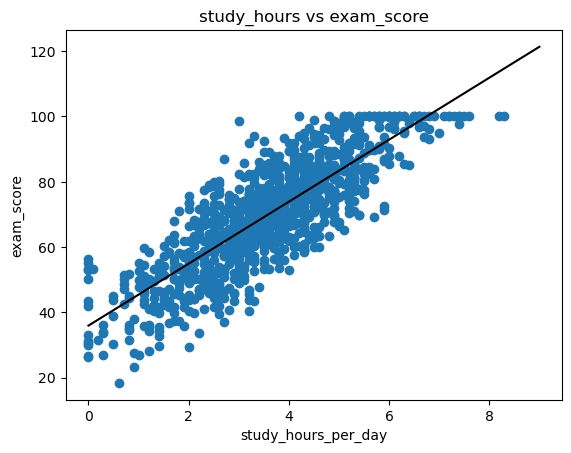

In [14]:
# y = mx + b
# y = slope(x) + intercept
m,b,corr_value,p_value,error = stats.linregress(df.study_hours_per_day,df.exam_score)
x = range(0,9 + 1)
y = m*x + b

plt.plot(x,y,color="black")
plt.scatter(df.study_hours_per_day,df.exam_score)
plt.title('study_hours vs exam_score')
plt.xlabel('study_hours_per_day')
plt.ylabel('exam_score')
plt.show()

#### This plot confirm the strong positive correlation between study hours and student's performance , the regression line show a clear upward trend of exam scores as the daily study hours increase

In [15]:
#heteroscedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols

# Fit the OLS model
model = ols(formula='exam_score~study_hours_per_day', data=df).fit()

white_test = het_white(model.resid,  model.model.exog)
bp_test = het_breuschpagan(model.resid, model.model.exog)

output_df = pd.DataFrame(columns=['LM stat', 'LM p-value', 'F-stat', 'F p-value'])
output_df.loc['White'] = white_test
output_df.loc['Breusch-Pagan'] = bp_test

output_df.round(3)

,LM stat,LM p-value,F-stat,F p-value
White,8.418,0.015,4.232,0.015
Breusch-Pagan,6.699,0.010,6.731,0.010


#### Heteroscedasticity means unequal scatter, specifically it's a systematic change in the spread of the residuals(error) over the range of measured values.

#### The commun method to calculate it are het_breushbagan and het_white, if all values of the table are significant we can assume that we have heteroscedasticity and vise-versa .

#### Here we have 2 significant value wich mean there is a little heteroscedasticity but it's okay.

### More tools to Visualize scatter plots

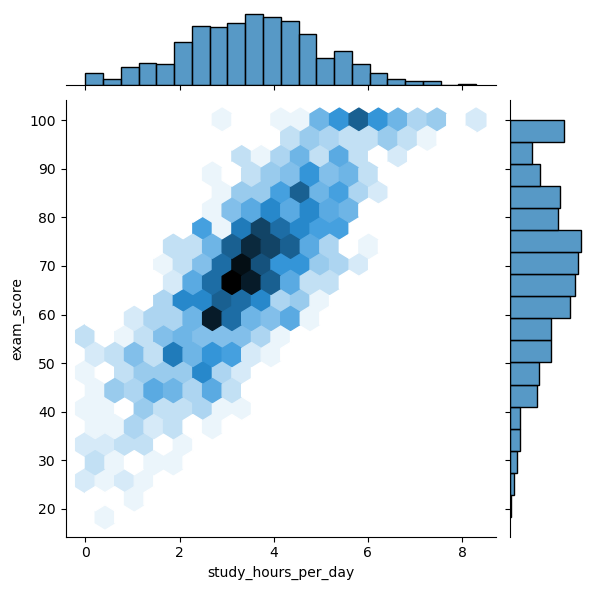

In [16]:
sns.jointplot(x='study_hours_per_day',y='exam_score',data=df,kind='hex');

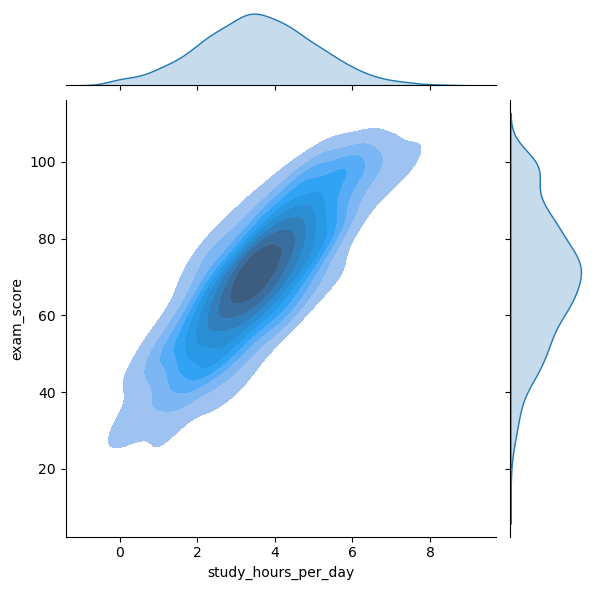

In [17]:
sns.jointplot(x='study_hours_per_day',y='exam_score',data=df,kind='kde',fill=True);

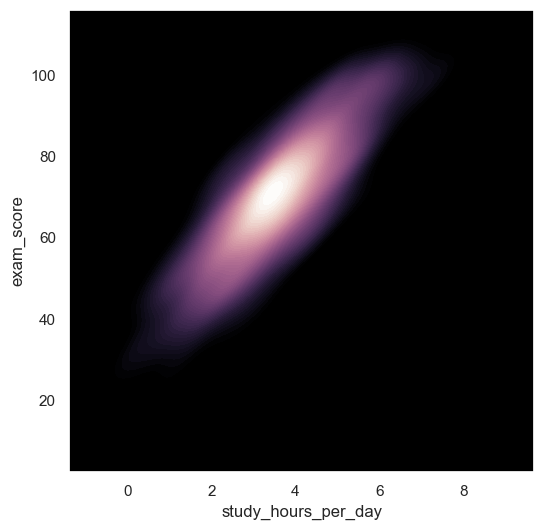

In [18]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'white', 'axes.grid':False})
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(x='study_hours_per_day', y='exam_score', data=df, cmap=cmap, n_levels=60, fill=True);

#### Analysis of the plots reveal a clear improvement in exam score as study time increases from 0 to approximately 4 hours per day, with the students achieving scores between 60 and 70. However, the trend slow down noticeably beyond the 4-hour mark, suggesting diminishing returns on score improvement with additional study time.

<Axes: xlabel='exam_score', ylabel='Count'>

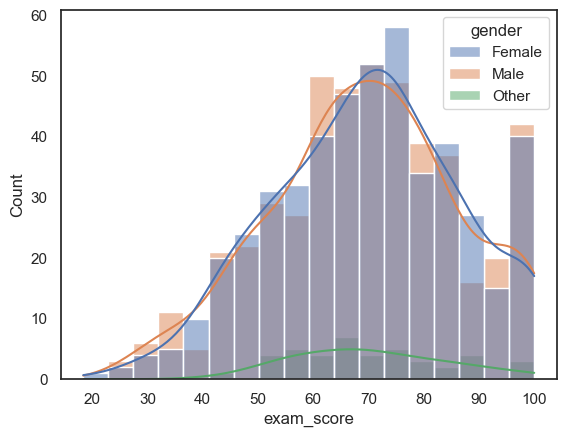

In [19]:
sns.set_style('white')
sns.histplot(data=df,x='exam_score',hue='gender',kde=True)

#### the histogram shows that the result are practicly the same for male and female, therfore gender does not have effect on scores

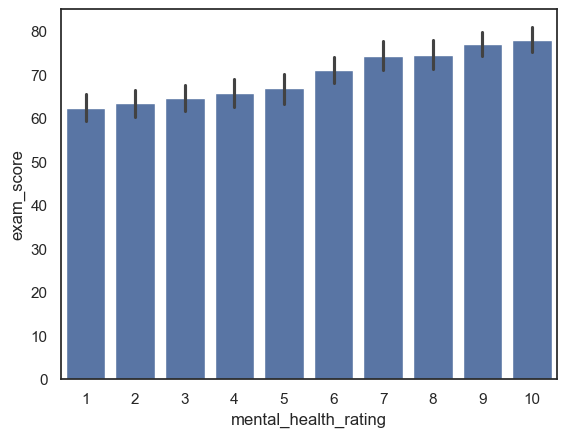

In [20]:
sns.barplot(data=df,x='mental_health_rating',y='exam_score')
plt.show()
#the bar shows the average score

#### The barplot indicate the meaningful relationship between mental health and student's performance. The average exam score demonstrates a consistent improvement as the mental health rating increases

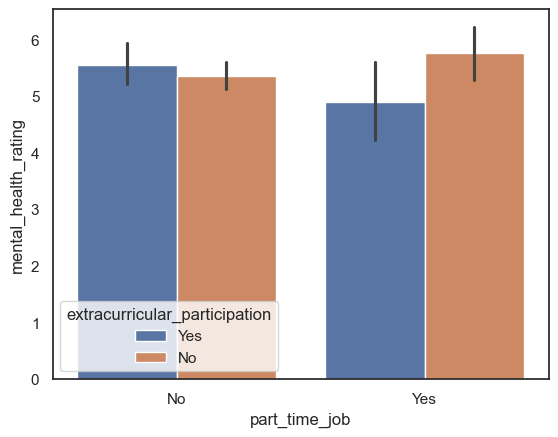

In [21]:
sns.barplot(data=df,x='part_time_job',y='mental_health_rating',hue='extracurricular_participation')
plt.show()

#### We observe that the mental health of students with both part time job and extracurricural participation are significantly lower than the other bars . This suggegst that combined workload can have significant effect on mental health and potentially leading to poorer academic performance.

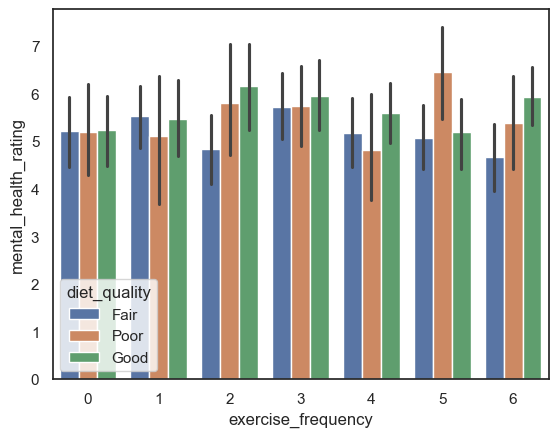

In [ ]:
# let's see the impact of diet and exercice frequency on mental health
sns.barplot(data=df,x='exercise_frequency',y='mental_health_rating',hue='diet_quality');
plt.show()

#### The barplot indicate that in general a better mental health for students with good diet. However, the data reveals a non-linear relationship between exercise frequency and mental well-being. It appear that the best frequency that beniffits mental healh is 2-3 times per week

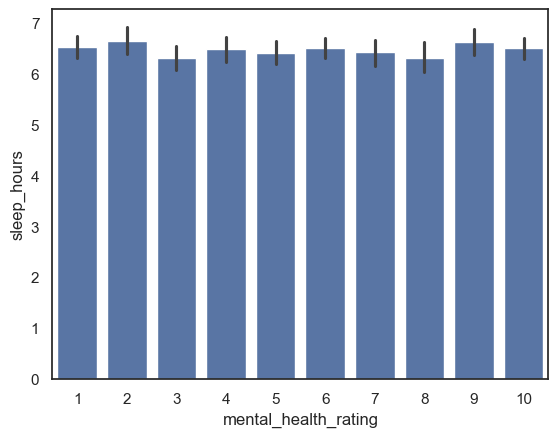

In [60]:
sns.barplot(data=df,x='mental_health_rating',y='sleep_hours')
plt.show()

#### The plots show no linear relationship between sleep hours and mental health

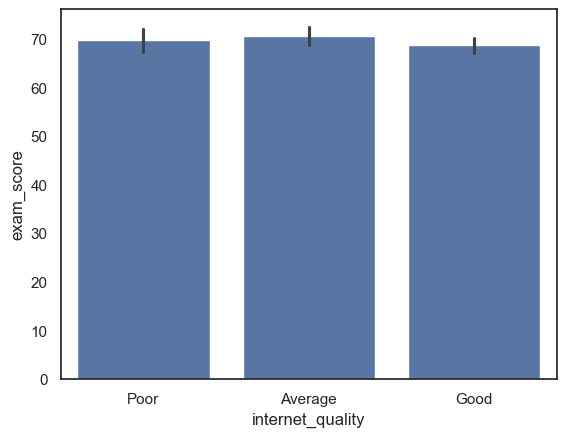

In [23]:
sns.barplot(data=df,x='internet_quality',y='exam_score',order=['Poor','Average','Good'])
plt.show()

#### The barplot show weak relationship between internet quality and students performance . However, students with good internet have less exam scores than the two other categoris.We could assume that with good internet students tend to spend more time on social media and other entertainment plateform on the internet

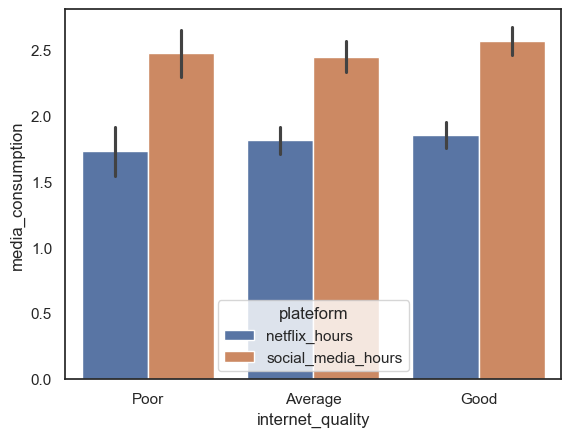

In [24]:
df_melted = df.melt(id_vars='internet_quality',value_vars=['netflix_hours','social_media_hours'],var_name='plateform',value_name='media_consumption')
sns.barplot(data=df_melted,x='internet_quality',y='media_consumption',hue='plateform',order=['Poor','Average','Good'])
plt.show()

#### The plot confirm our hypotesis, students with 'Good' internet quality report a slightly higher average daily usage on both Netflix and social media platforms

### 3D plots Visualisation 

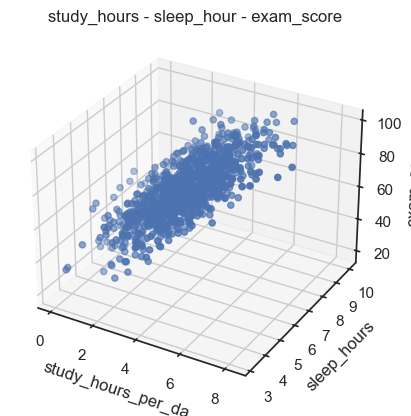

In [26]:
#2D visualisation of a 3D Plot 
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(df['study_hours_per_day'], df['sleep_hours'], df['exam_score'])

ax.set_title('study_hours - sleep_hour - exam_score')
ax.set_xlabel('study_hours_per_da')
ax.set_ylabel('sleep_hours')
ax.set_zlabel('exam_score')

plt.show()

In [ ]:
# Plotly is a better Library for data visualisation and it's also interactive
import plotly.express as px

fig = px.scatter_3d(df, x='study_hours_per_day', y='mental_health_rating', z='exam_score',color='part_time_job',symbol='extracurricular_participation')
fig.show()

# Save a static image for GitHub
fig.write_image("3d_plot_static.png")

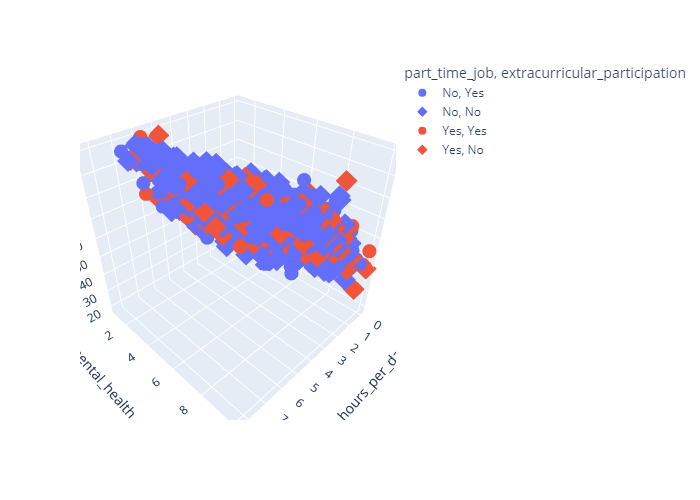

In [35]:
# display the static image in the notebook so GitHub shows it
from IPython.display import Image
Image("3d_plot_static.png")

#### The 3D plot confirm a high correlation between stydy hours and exam score and the meaningful relationship between mental health and exam score. However, there is no apparent relationship between study hours and mental health rating, the study hours data are fairly spread for each level of mental health rating. Furthermore the data of students with or without part time job and extracurricular participation are spread across all level of study hours, indicating no clear link between having a job or a extracurricular participation and time spent studying.

In [36]:
fig = px.scatter_3d(df, x='netflix_hours', y='social_media_hours', z='exam_score',color='part_time_job',symbol='extracurricular_participation')
fig.show()

fig.write_image("3d_plot_static.png")

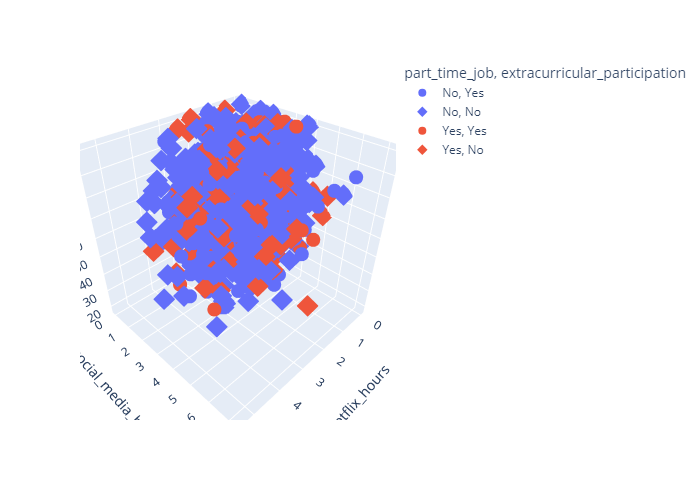

In [37]:
Image("3d_plot_static.png")

#### The 3D plot confirm the weak negative corelation between both netflix and social media hours by showing a wide dispersion of data points. Notably, there are multiple instances of students achieving high exam scores having netflix or social media hours go from 0 to 4 hours per day but the score start to decrease significantly after.

## T-test, One-way ANOVA

In [29]:
# Split exam_score by group
scores_yes = df.loc[df['part_time_job'] == 'Yes', 'exam_score']
scores_no  = df.loc[df['part_time_job'] == 'No',  'exam_score']

# Run independent t-test
t, p = stats.ttest_ind(scores_yes, scores_no)

#we choose 0.05 as our level for p-value to be acceptable
print("t-statistic:", t)
print("p-value:", p)

t-statistic: -0.8408893908348427
p-value: 0.4006113244264293


In [30]:
#Another way of splitting categorical feature
scores_yes = df[df['extracurricular_participation'] == 'Yes']
scores_no  = df[df['extracurricular_participation'] == 'No']

# Run independent t-test
t, p = stats.ttest_ind(scores_yes['exam_score'], scores_no['exam_score'])

#we choose 0.05 as our level for p-value to be acceptable
print("t-statistic:", t)
print("p-value:", p)

t-statistic: 0.02782137289883962
p-value: 0.9778101815863728


In [31]:
#create a function for splitting and t-testing
def t_test(feature,label):
    groups = df[feature].unique()
    scores_yes = df[df[feature] == groups[0]]
    scores_no  = df[df[feature] == groups[1]]

    # Run independent t-test
    t, p = stats.ttest_ind(scores_yes[label], scores_no[label])
    return t,p

print(f"extracurricular_participation : t-statistic = {t_test('extracurricular_participation','exam_score')[0]} , p-value = {t_test('extracurricular_participation','exam_score')[1]}")
print(f"part_time_job : t-statistic = {t_test('part_time_job','exam_score')[0]} , p-value = {t_test('part_time_job','exam_score')[1]}")


extracurricular_participation : t-statistic = 0.02782137289883962 , p-value = 0.9778101815863728
part_time_job : t-statistic = 0.8408893908348427 , p-value = 0.4006113244264293


#### Since the p-values are not less than 0.05, then we cannot reject the null hypothesis wich mean that there is much evedince to prove that there is a different between the means of exam score of the two group

In [32]:
#create a function for One-way Anova (takes 3 or more groups)
def Anova(feature,label):
    groups = df[feature].unique()
    group_values = []
    for group in groups :
        group_values.append(df[df[feature]==group][label])

    # Run independent t-test
    return stats.f_oneway(*group_values) #dynamically put list of values inside the function

print(f"Gender : {Anova('gender','exam_score')}")
print(f"Diet_quality : {Anova('diet_quality','exam_score')}")
print(f"Internet_quality :{Anova('internet_quality','exam_score')}")
print(f"parental_education_level:{Anova('parental_education_level_rank','exam_score')}")

Gender : F_onewayResult(statistic=0.1422825683289215, pvalue=0.8673937379445218)
Diet_quality : F_onewayResult(statistic=1.2662049986695567, pvalue=0.28235232253240805)
Internet_quality :F_onewayResult(statistic=1.4630112114998204, pvalue=0.2320346510834057)
parental_education_level:F_onewayResult(statistic=0.6525354575694585, pvalue=0.5814493162924801)


#### Since all p-values are much larger than 0.05, the ANOVA tests did not find significant effects of these categorical features on exam_score.

## Conclusion and Habits Recommendation

### Insights :

#### - the daily hours study the most significant and direct positive impact on student's performance 
#### - Mental health play a meaningful role in academic studies
#### - part time jobs,extracurricular activities,diet and exercice frequency doesn't have a strong relationship with exam scores but they are factors influencing mental health 
#### - As predicted social media consumption have a negative correlation with student's performance 
#### - Parental level of eduction doesn't have a meaningful impact on student's performance

### Answer of key questions :

### 1- What are the habits that improve academic performance ?

### the most important factor is consistent daily study, it has a strong and immediate effect on exam performance. Furtheremore, mental health is also important as it enables effective studying and in order to have a well-mental health students must practice exercices and have a good diet and they shouldn't combine workload like part time job and extracurricural activities .

### 2- Which habits negatively affect academic performance ?

### with no surprise, high media consumption is the primary habit that has a negative effect on exam score.

### 3- What are the most efficient habits to achieve good results with minimal effort ?

### After the analysis my student's habits recommendation would be :

####  - study smart : 3-4 hours daily study

####  - 2-3 exercice per week and to have a good diet

####  - don't combine part time job and extracurricural activities

####  - limit media consumption to under 4 hours per day

### This efficient approach maximizes academic output by focusing on the most impactful habits while maintaining the mental energy needed to sustain them.
